In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import powerlaw
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io as sio

from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import  matplotlib.markers as mark

from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

import os
from os.path import expanduser

In [4]:
# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 7})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"

In [5]:
# paths
save_fig_path = '../figs/'

load_path =  '../paper_figures_data/fig3/'
abc_path = '../paper_figures_data/fig3/'

- functions

In [6]:
def sing_exp(x, a, t1):
    '''
    single exponential
    '''
    return a * np.exp(-x/t1) 

def double_exp(x, a, b, t1, t2):
    '''
    double exponential
    '''
    return a * (1-b) * np.exp(-x/t1) + a * (b) * np.exp(-x/t2) 

def sing_exp_oscil(x, a, t1, coef, phase):
    '''
    single exponential mixed with oscillation with f=2
    '''
    f = 2
    return a * (coef * np.exp(-x/t1)  + (1-coef) * np.sqrt(2)*np.sin(phase + 2* np.pi*0.001 * f * x))

# fig 3, abc fits

- loading data

In [7]:
binSize = 1
st = 2

# single OU
ac_examp_singOU =  np.load(load_path + 'ac_sing_tau20_T1000.npy')
data_map =  np.load(load_path + 'best_abcFit_linDist_singOU_fitupto50_lag65_step33.npy',allow_pickle=True)
ac_map_singOU = data_map[0]
abc_singOU =  np.load(abc_path + 'singTau_20_linearDist_deltaT1_lag50_steps43.npy',allow_pickle=True)

step_singOU = 33
eps_singOU = []
accR_singOU = []
stp_singOU = np.arange(st,step_singOU+1)
for j in range(st-1,step_singOU):
    i = abc_singOU[j]
    eps_singOU.append(i['epsilon'])
    accR_singOU.append(i['n accepted']/i['n total'])

    
# single OU with oscillation
ac_examp_1oscil =  np.load(load_path + 'ac_1oscil_example_tau_60_f2.npy')
data_map = np.load(load_path + 'NEW_best_abcFit_linDist_1oscil_tau_60_f2.npy',allow_pickle=True)
ac_map_1oscil = data_map[0]
abc_1oscil =  np.load(abc_path + '1tauOscil_tau60_lag100_deltaT02_steps35.npy',allow_pickle=True)
step_1oscil = 35
eps_1oscil = []
accR_1oscil = []
stp_1oscil = np.arange(st,step_1oscil+1)
for j in range(st-1, step_1oscil):
    i = abc_1oscil[j]
    eps_1oscil.append(i['epsilon'])
    accR_1oscil.append(i['n accepted']/i['n total'])


# double OU with spikes 
ac_examp_dbSpikes = np.load(load_path + '2_ac_dbSpikes_examp_tau_5_80_b1_a05.npy',allow_pickle=True)
data_map = np.load(load_path + 'best_abcFit_linDist_dbdbSpikes_tau_5_80_b1_a05_T1000_fitupto110_lag150_steps45_2.npy',allow_pickle=True)
ac_map_dbSpikes = data_map[0]
map_params_dbSpikes = data_map[1]
abc_dbSpikes =  np.load(abc_path + 'dbSpikes_5_80_b1_a05_lag110_steps45.npy',allow_pickle=True)
step_dbSpikes = 45
eps_dbSpikes = []
accR_dbSpikes = []
stp_dbSpikes = np.arange(st,step_dbSpikes+1)
for j in range(st-1,step_dbSpikes): 
    i = abc_dbSpikes[j]
    eps_dbSpikes.append(i['epsilon'])
    accR_dbSpikes.append(i['n accepted']/i['n total'])

- plotting

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in log10


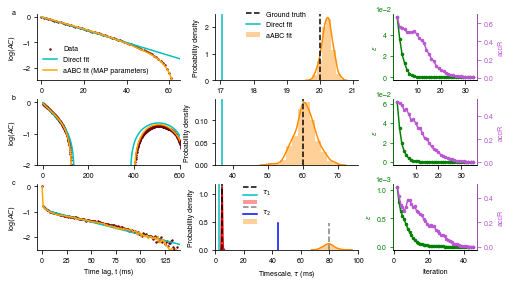

In [8]:
# fig = plt.figure(figsize=(28,17))
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(20*cm, 11*cm))
fig.subplots_adjust(hspace=0.8, wspace=1.5)

plt.rcParams["axes.formatter.limits"] = "-2,2"


ft = 7
fleg = 7
fs = 7
feps = 7

cABC = 'darkorange'
cABC2 = 'r'
cAC = plt.cm.Reds(250)
cMAP = 'orange'
cAccR = 'mediumorchid'
cErr = 'g'
ctheor = 'k'
ctheor2 = 'gray'

cExp = 'c'
cExp2 = 'b'

ss = 2
a = 0.4 #transparency
lw = 1.5
hsp = 0.1 #handle space
ms = 2.5 #marker size for error panels

timeLag_label = r'Time lag, t (ms)'
log_ac_label = r'log$(AC)$'
ac_label = r'$AC$'
prob_label = r'Probability density'
abc_fit_label_ac = r'aABC fit (MAP parameters)'
abc_fit_label = r'aABC fit'
exp_fit_label = r'Direct fit'
data_label = r'Data'

abc_fit_label_tau1 = r'$\tau_1$'
abc_fit_label_tau2 = r'$\tau_2$'
gt_label_tau1 = r'$\tau_1$'
gt_label_tau2 = r'$\tau_2$'
gt_label = r'Ground truth'
time_label = r'Timescale, $\tau$ (ms)'


err_label = r'$\epsilon$'
step_label = 'Iteration'
accR_label = r'accR'
 
x_text = -0.18
y_text = 1
xsci = -0.22


x = 6
y = 8

############### one timescale OU ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 0), colspan=3,rowspan=2)
ax.text(x_text,y_text,'a',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_examp_singOU
binLags = np.arange(0, len(ac), binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC ,label= data_label, s = ss)

ac = ac_map_singOU
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP ,label=abc_fit_label_ac,\
        linewidth = lw, zorder = 4)

ac = ac_examp_singOU[:-1]
binLags = np.arange(0, len(ac), binSize)
popt, pcov = curve_fit(sing_exp, binLags, ac, maxfev = 2000)
ax.plot(binLags, np.log10(sing_exp(binLags, *popt)), '-', color = cExp, linewidth = lw,\
         label=exp_fit_label % (popt[1]), zorder = 1)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon = False, fontsize = fleg, loc = 'lower left')
plt.ylabel(log_ac_label)
plt.ylim([-2.5,0.1])
plt.xlim([-2,65])

plt.ticklabel_format(axis="x", style="plain")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 3), colspan=3,rowspan=2)

abc = abc_singOU
step = step_singOU
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(19.,21.,0.15), facecolor= cABC, density=True, alpha = a,\
        label =abc_fit_label)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(20, color = ctheor, label = gt_label, linewidth = lw, linestyle = '--')

plt.axvline(popt[1], color = cExp, label = exp_fit_label, linewidth = lw, linestyle = '-')

plt.ylabel(prob_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, fontsize = fleg, loc = 'upper right', bbox_to_anchor=(0.68,1.15))

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 6), colspan=2,rowspan=2)
ax.plot(stp_singOU,eps_singOU,'-o', color = cErr, markersize = ms)
ax.set_ylabel(err_label, color = cErr, fontsize = feps)

ax.tick_params(axis='y', colors= cErr) 

ax5 = ax.twinx()
ax5.plot(stp_singOU,accR_singOU,'-o', color = cAccR, markersize = ms)
ax5.set_ylabel(accR_label, color = cAccR)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_color(cAccR)
ax5.spines['left'].set_color(cErr)
ax5.tick_params(axis='y', colors=cAccR)

ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.get_yaxis().get_offset_text().set_x(xsci)


############### one timescale oscill ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 0), colspan=3,rowspan=2)
ax.text(x_text,y_text,'b',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_examp_1oscil
binLags = np.arange(0, len(ac), binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC ,label=data_label, s = ss)

ac = ac_map_1oscil
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP ,label=abc_fit_label_ac, linewidth = lw, zorder = 4)

ac = ac_examp_1oscil[:-1]
binLags = np.arange(0, len(ac), binSize)
popt, pcov = curve_fit(sing_exp_oscil, binLags, ac, maxfev = 2000)
ax.plot(binLags, np.log10(sing_exp_oscil(binLags, *popt)), '-', color = cExp, linewidth = lw, \
         label = exp_fit_label % (popt[1]))

plt.ylabel(log_ac_label)
plt.ylim([-2.,0.1])
plt.xlim([-25,600])

plt.yticks([-2,-1,0])
plt.ticklabel_format(axis="x", style="plain")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 3), colspan=3,rowspan=2)

abc = abc_1oscil
step = step_1oscil
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(50,75,1.7), facecolor= cABC, density=True, alpha = a,\
        label =abc_fit_label)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(60, color = ctheor, label = gt_label, linewidth = lw, linestyle = '--')
plt.axvline(popt[1], color = cExp, label = exp_fit_label, linewidth = lw, linestyle = '-')

plt.ylabel(prob_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 6), colspan=2,rowspan=2)
ax.plot(stp_1oscil,eps_1oscil,'-o', color = cErr, markersize = ms)
# ax.set_xlabel(step_label)
ax.set_ylabel(err_label, color = cErr, fontsize = feps)
ax.tick_params(axis='y', colors= cErr) 

ax5 = ax.twinx()
ax5.plot(stp_1oscil,accR_1oscil,'-o', color = cAccR, markersize = ms)
ax5.set_ylabel(accR_label, color = cAccR)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_color(cAccR)
ax5.spines['left'].set_color(cErr)
ax5.tick_params(axis='y', colors=cAccR)

ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.get_yaxis().get_offset_text().set_x(xsci)



############### db spikes ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 0), colspan=3,rowspan=2)
ax.text(x_text,y_text,'c',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_examp_dbSpikes
ac_data = ac/ac[0]
binLags = np.arange(0, len(ac), binSize)
plt.scatter(binLags[ac_data>0],np.log10(ac_data[ac_data>0]),color = cAC ,\
            label=data_label, s = ss)

ac = ac_map_dbSpikes
ac = ac/ac[0]
timescales = map_params_dbSpikes[0:2]
binLags = np.arange(0, 150 + binSize, binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP ,\
         label=abc_fit_label_ac, linewidth = lw, zorder = 4)


ac = ac_examp_dbSpikes
ac_data = ac/ac[0]
binLags = np.arange(0, len(ac), binSize)
xdata = binLags[1:]
ydata = ac_data[1:]
popt, pcov = curve_fit(double_exp, xdata,ydata , maxfev = 2000)
timescales = popt[2:]
ax.plot(xdata, np.log10(double_exp(xdata, *popt)), '-', color = cExp, linewidth = lw, \
         label=exp_fit_label)

plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-2.5,0.1])
plt.xlim([-5,140])

plt.ticklabel_format(axis="x", style="plain")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 3), colspan=3,rowspan=2)

abc = abc_dbSpikes
step = step_dbSpikes
tau1 = abc[step - 1][0][0]
tau2 = abc[step - 1][0][1]
coef = abc[step - 1][0][2]

ax.hist(tau1, bins = np.arange(0,27,1), facecolor= cABC2, density=True, alpha = a, \
        label = abc_fit_label_tau1)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC2)
plt.axvline(5, color = ctheor, label =gt_label_tau1, linewidth = lw, linestyle = '--')
plt.axvline(2.3, color = cExp, label =gt_label_tau1, linewidth = lw, linestyle = '-')

ax.hist(tau2, bins = np.arange(60,100,1), facecolor= cABC, density=True, alpha = a,\
        label = abc_fit_label_tau2)
sns.kdeplot(tau2, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(80,ymin = 0, ymax = 0.4, color = ctheor2, label =gt_label_tau2, linewidth = lw,\
            linestyle = '--')
plt.axvline(44,ymin = 0, ymax = 0.4, color = cExp2, label =gt_label_tau2, linewidth = lw,\
            linestyle = '-')

plt.xlim([0,100])


handles, labels = ax.get_legend_handles_labels()
handles_t1, labels_t1 = [handles[0],handles[1], handles[4]], [labels[0],labels[1],labels[4]]
leg1 = ax.legend(handles_t1, labels_t1,frameon = False, fontsize = fleg, bbox_to_anchor=(0.15,1.1), \
                 loc = 'upper left',labelspacing=-0.25)
for text in leg1.texts:
    text.set_visible(False)  # disable label
    
handles, labels = ax.get_legend_handles_labels()
handles_t1, labels_t1 = [handles[2],handles[3],handles[5]], [labels[2],labels[3],labels[5]]
leg2 = ax.legend(handles_t1, labels_t1,frameon = False, fontsize = fleg, bbox_to_anchor=(0.15,0.8), \
                 loc = 'upper left', labelspacing=-0.27)
for text in leg2.texts:
    text.set_visible(False)  # disable label

ax.add_artist(leg1)
plt.text(0.33,0.85,gt_label_tau1, transform=ax.transAxes, fontsize = fleg)
plt.text(0.33,0.55,gt_label_tau2, transform=ax.transAxes, fontsize = fleg)


plt.ticklabel_format(axis="x", style="plain")
plt.xlabel(time_label)
plt.ylabel(prob_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 6), colspan=2,rowspan=2)
# ax.plot(stp_dbSpikes,np.log10(eps_dbSpikes),'-o', color = cErr)
ax.plot(stp_dbSpikes,(eps_dbSpikes),'-o', color = cErr, markersize = ms)
ax.set_xlabel(step_label)
ax.set_ylabel(err_label, color = cErr, fontsize = feps)
ax.set_yticks(np.arange(0,0.0015,0.0005)) 
ax.tick_params(axis='y', colors= cErr) 

ax5 = ax.twinx()
ax5.plot(stp_dbSpikes,accR_dbSpikes,'-o', color = cAccR, markersize = ms)
ax5.set_ylabel(accR_label, color = cAccR)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_color(cAccR)
ax5.spines['left'].set_color(cErr)
ax5.tick_params(axis='y', colors=cAccR)

ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.get_yaxis().get_offset_text().set_x(xsci)

# plt.savefig(save_fig_path+'fig3.pdf',bbox_inches='tight')